# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">06 Cluster Analysis in Python</h1>

You have probably come across Google News, which automatically groups similar news articles under a topic. Have you ever wondered what process runs in the background to arrive at these groups? In this course, you will be introduced to unsupervised learning through clustering using the SciPy library in Python. This course covers pre-processing of data and application of hierarchical and k-means clustering. Through the course, you will explore player statistics from a popular football video game, FIFA 18. After completing the course, you will be able to quickly apply various clustering algorithms on data, visualize the clusters formed and analyze results.

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [1. Introduction to Clustering](#1)
    - Unsupervised learning: Basics
    - Basics of cluster analysis
    - Data preparation for cluster analysis

* [2. Hierarchical Clustering](#2) 
    - Basics of hierarchical clustering
    - Visualize clusters
    - How many clusters?
    - Limitations of hierarchical clustering
    
* [3. K-Means Clustering](#3)
    - Basics of k_means clustering
    - How many clusters?
    - Limitations of k-means clustering
    
* [4. Clustering in Real World](#4)
    - Dominant colors in images
    - Document clustering
    - Clustering with multiple features
    - Farewell

In [2]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing the course datasets 
fifa = pd.read_csv('datasets/fifa_18_dataset.csv')
fifa_sample = pd.read_csv('datasets/fifa_18_sample_data.csv')
movies = pd.read_csv('datasets/movies_plot.csv')

In [3]:
fifa

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29
...,...,...
17989,10,16
17990,13,44
17991,14,26
17992,47,46


In [4]:
fifa_sample

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,https://cdn.sofifa.org/18/teams/461.png,2040,26,Spanish Primera División,1991-04-14,175.0,...,False,True,False,False,False,False,False,False,False,False
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,https://cdn.sofifa.org/18/teams/110980.png,2009,25,Chilian Primera División,1992-02-29,187.0,...,False,False,False,False,False,False,False,False,False,False
997,31831,K. Källström,Kim Källström,Djurgårdens IF,https://cdn.sofifa.org/18/teams/710.png,2005,34,Swedish Allsvenskan,1982-08-24,185.0,...,False,False,False,False,False,False,False,False,False,False
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,https://cdn.sofifa.org/18/teams/896.png,1206,28,Swiss Super League,1989-03-29,188.0,...,False,False,False,False,False,False,False,False,False,True


In [5]:
movies

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...
...,...,...
995,Unknown Island,Adventure-seeker Ted Osborne (Phillip Reed) an...
996,Boss Nigger,"Upon finding a wagon under attack by bandits, ..."
997,Secret Command,The plot involves a U.S. effort to root out Na...
998,The Monolith Monsters,"In the desert outside of San Angelo, Californi..."


## <a id="1"></a>
<font color="lightseagreen" size=+2.5><b>1. Introduction to Clustering</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Before you are ready to classify news articles, you need to be introduced to the basics of clustering. This chapter familiarizes you with a class of machine learning algorithms called unsupervised learning and then introduces you to clustering, one of the popular unsupervised learning algorithms. You will know about two popular clustering techniques - hierarchical clustering and k-means clustering. The chapter concludes with basic pre-processing steps before you start clustering data.

## 1 01 Unsupervised learning: basics

1. Unsupervised learning: basics

Hi everyone! Welcome to the video of this course. In this video, we will focus on unsupervised learning, business problems that are solved using such techniques and basic plotting of points that would help us later in the course! Let's get started.

2. Everyday example: Google news

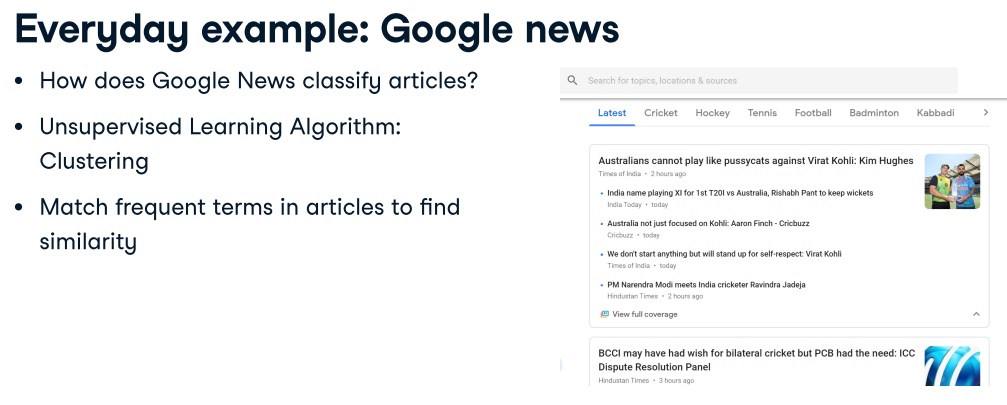

While browsing through Google News, have you wondered what goes behind grouping news items together? How does the algorithm decide which articles are similar? It is the result of an unsupervised learning algorithm. It scans through the text of each article and based on frequently occurring terms, groups articles together. The group of articles shown here is based on the Indian cricket team. Through this course, you will be introduced to various clustering techniques. Similar to this example, you will also perform document clustering on text.

3. Labeled and unlabeled data

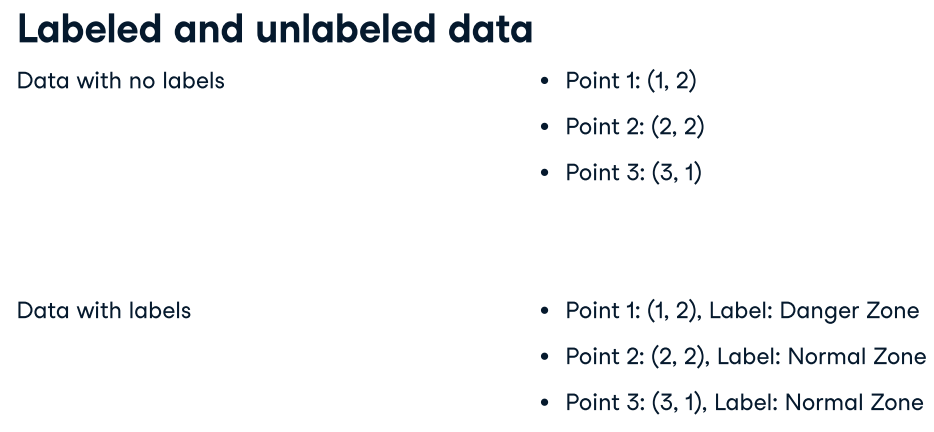

Before we define unsupervised learning, let us try to understand the terms: labeled and unlabeled data. Imagine you have a list of points with X and Y coordinates. If only the coordinates of the points are available and there is no other characteristic available to distinguish the data points, it is called unlabeled data. At the same time, if we associate each data point with a group beforehand, say normal and danger zones, we call it labeled data.

4. What is unsupervised learning?

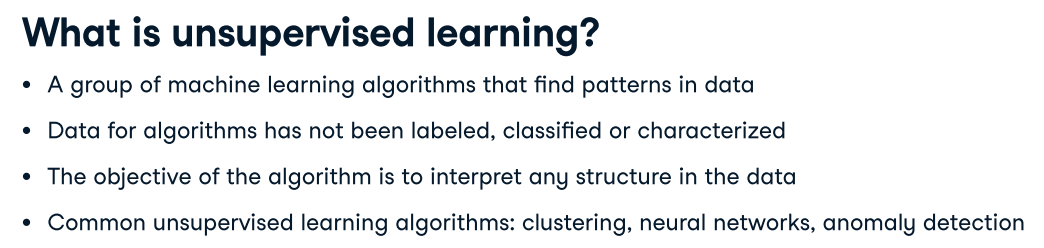

What is unsupervised learning? It is an umbrella term for a group of machine learning algorithms that are used to find patterns. The data that is used in these algorithms is not labeled, classified or characterized prior to running the algorithm. The algorithm is run, therefore, to find and explain inherent structures within the data. Common unsupervised learning algorithms are clustering, anomaly detections, and neural networks. Clustering is used to group similar data points together.

5. What is clustering?

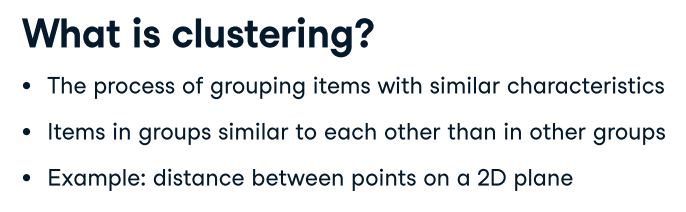

Let us now move on to a specific class of unsupervised learning algorithms. Clustering is the process of grouping items with similar characteristics. The groups so formed are such that items in a single group are closer to each other in terms of some characteristics as compared to items in other clusters. Clustering falls under the group of unsupervised learning algorithms as the data is not labeled, grouped or characterized beforehand. A simple example to demonstrate clustering would be to group points on a 2D plane based on their distance. Let us try to visualize it in Python.

6. Plotting data for clustering - Pokemon sightings

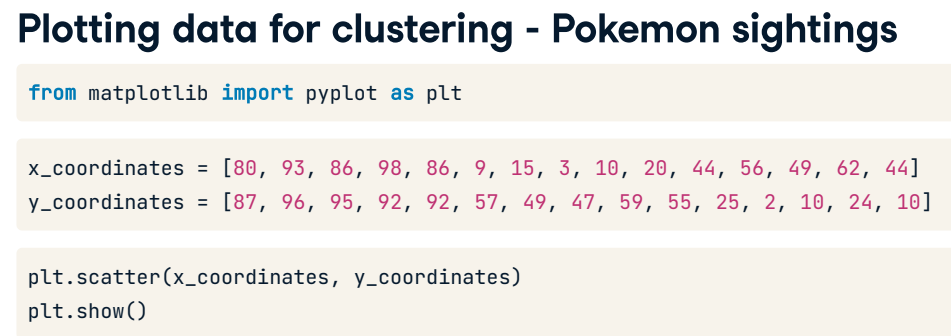

To make a scatter plot, we will use the pyplot class of the matplotlib library in Python. We will plot the sightings of Pokemon in a park in the form of coordinates. The first step, therefore, is to import the required class as plt. Next, we define the coordinates of points to be plotted in two lists - one each for x and y coordinates. In this case, we have fifteen sightings that we would like to plot. Finally, we use the scatter method of the pyplot class, with the lists for the coordinates as arguments and the plot method to display the plot. Let us see how the plot looks.

7. Plotting data for clustering - the scatter plot

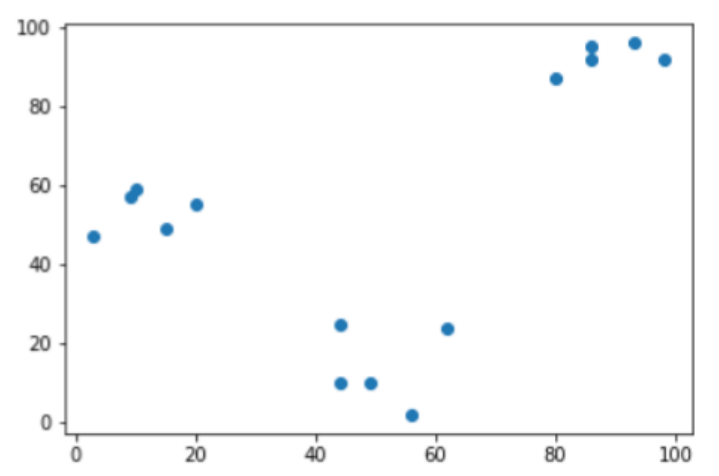

Here is how the plot looks like. As a preliminary analysis before you perform any clustering analysis on the points, visualizing helps you understand how many natural clusters are present in the data. There are three clusters in the data, which

8. Plotting data for clustering - clusters

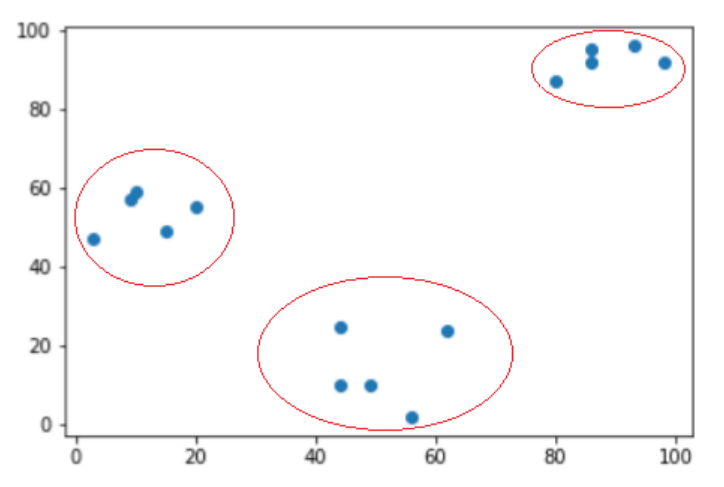

are highlighted in the plot. By visualizing this data, you can infer with some confidence where the Pokemon actually are!

9. Up next - some practice

Although this is a simplified case, real life problems may not have an obvious solution, and you may have to employ more analysis to decipher how many clusters there actually are, which you will learn later in the course. It is time for some exercises based on this video.

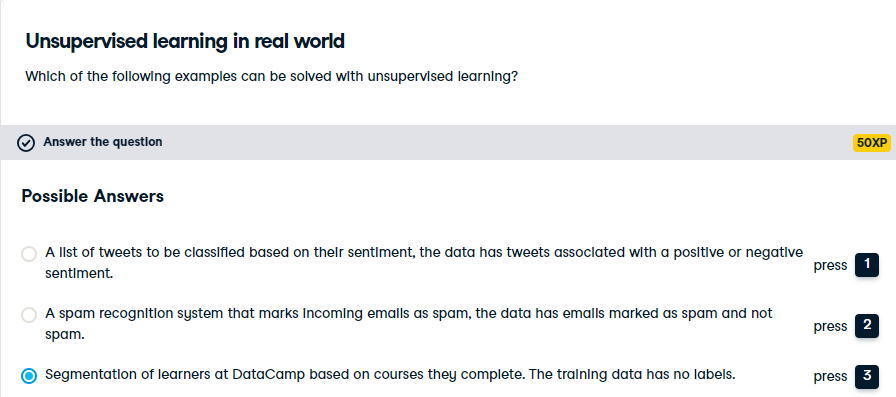

That is correct! As the training data has no labels, an unsupervised algorithm needs to be used to understand patterns in the data.

### Exercise

**Pokémon sightings**

There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x and y, respectively.

**Instructions**

- Import the pyplot class from matplotlib library as plt.
- Create a scatter plot using the pyplot class.
- Display the scatter plot created in the earlier step.

In [6]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

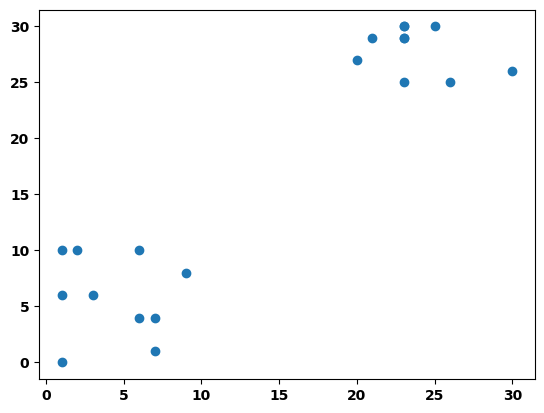

In [7]:
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

That is correct! Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!

## 1 02 Basics of cluster analysis

1. Basics of cluster analysis

Hello everyone! Now that you are familiar with unsupervised learning, let us move on to the basics of cluster analysis.

2. What is a cluster?

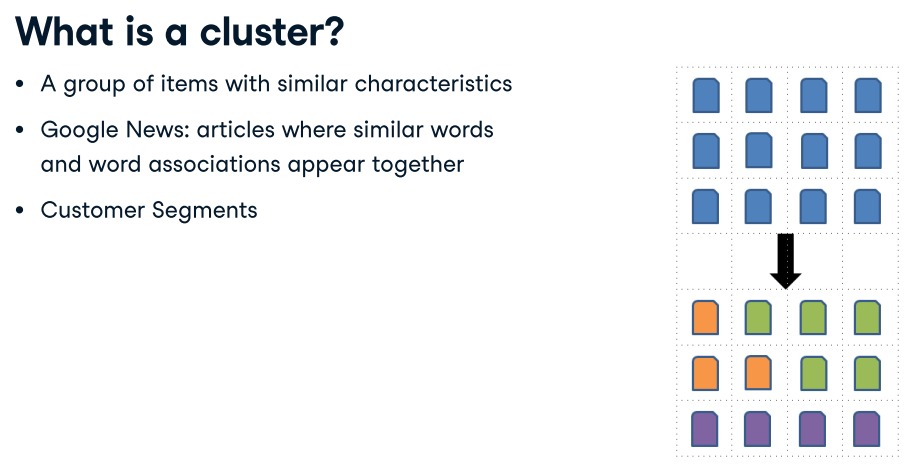

First, let us define a cluster. It is a group of items with similar characteristics. In the Google News example, a cluster of news articles has similar words and word associations appearing in them. Another example of clustering is segmentation of customers based on their spending habits. A cluster of customers would exhibit similar spending habits.

3. Clustering algorithms

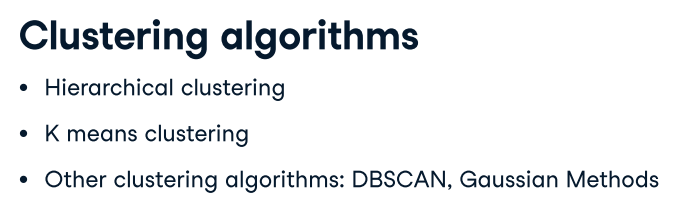

Although there are other algorithms like the density based DBSCAN technique or Gaussian models for cluster analysis, this course will focus only on the two most common techniques - hierarchical and k-means clustering.

4. Hierarchical clustering algorithm: Step 1

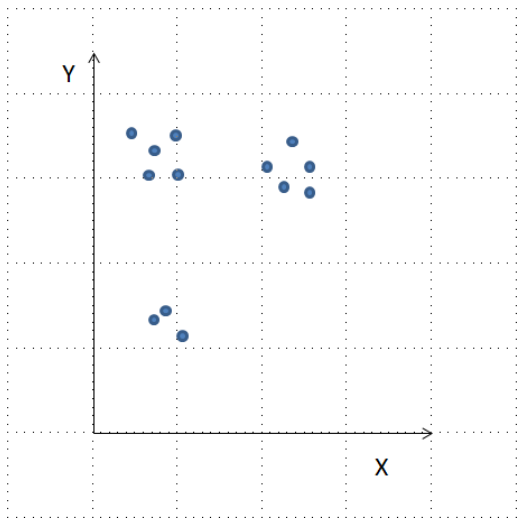

Let us look at the steps in hierarchical clustering before the implementation. For demonstration purposes, let us consider 13 points on a 2D plane.

5. Hierarchical clustering algorithm: Step 2

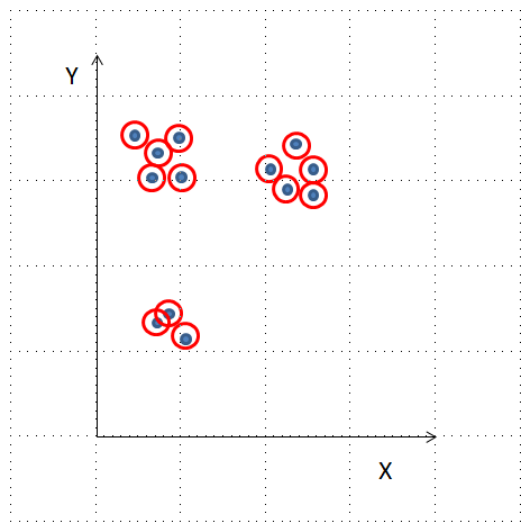

In the first step, all the points are considered as individual clusters. A cluster center is a mean of attributes of all data points in a cluster. In this case, cluster centers will have two attributes - the mean of x and y coordinates. At this stage, cluster centers of all clusters are the coordinates of the individual points.

6. Hierarchical clustering algorithm: Step 3

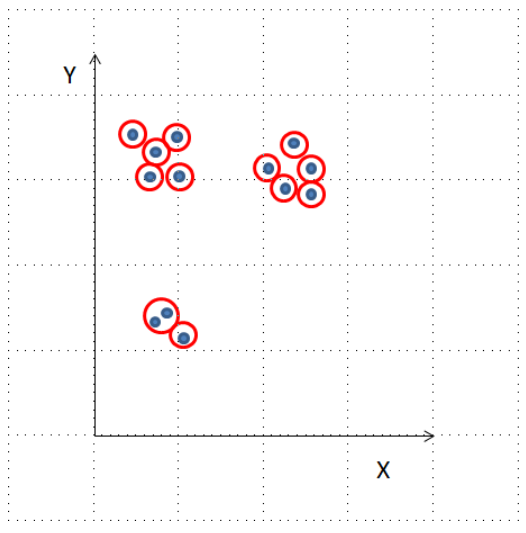

Next, the distances between all pairs of cluster centers are computed and the two closest clusters are merged. The cluster center of the merged cluster is then recomputed. In the example, two clusters on the bottom left have been merged. At this step, we are left with 12 clusters, one less than we started.

7. Hierarchical clustering algorithm: Step 4

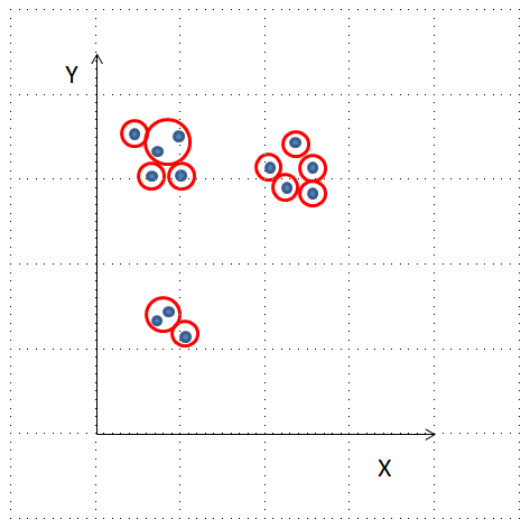

In the second step, the clusters with the closest cluster centers are merged on the top left. This process of merging the two closest clusters continues until we arrive at the desired clusters. At every step, the number of clusters reduces by one. As visible from the distribution of points, let us stop at three clusters.

8. Hierarchical clustering algorithm: Step 5

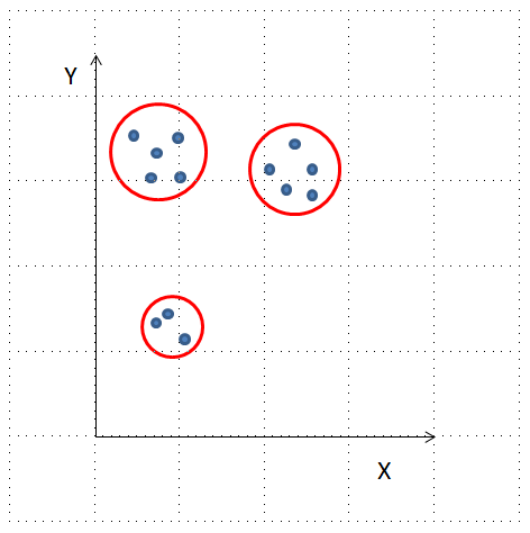

Finally, these are three clusters that you arrive at after the algorithm has run. Let us now look at its simple implementation in SciPy.

9. Hierarchical clustering in SciPy

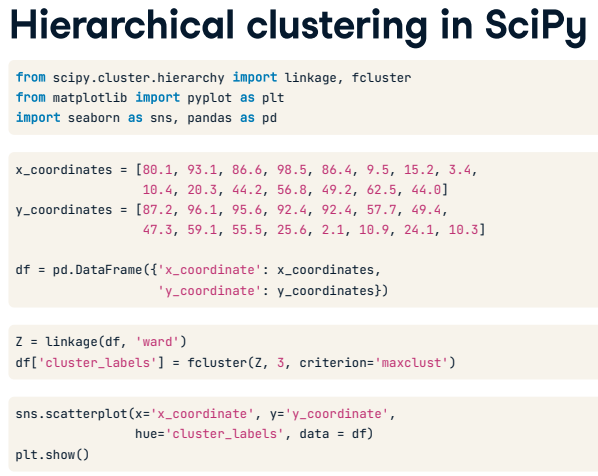

The required methods for hierarchical clustering, linkage and fcluster, are stored in scipy-dot-cluster-dot-hierarchy. We will explore the parameters of these methods later in the course. We additionally import pyplot and seaborn for visualization and pandas for data manipulation. A list of fifteen points with x and y coordinates is stored in a DataFrame. First, the linkage method computes distances between intermediate clusters. Next, the fcluster method generates clusters and assigns associated cluster labels to a new column in the DataFrame. Finally, we plot the points using seaborn with the cluster labels as the hue argument to associate clusters with different colors.

10. Hierarchical clustering results

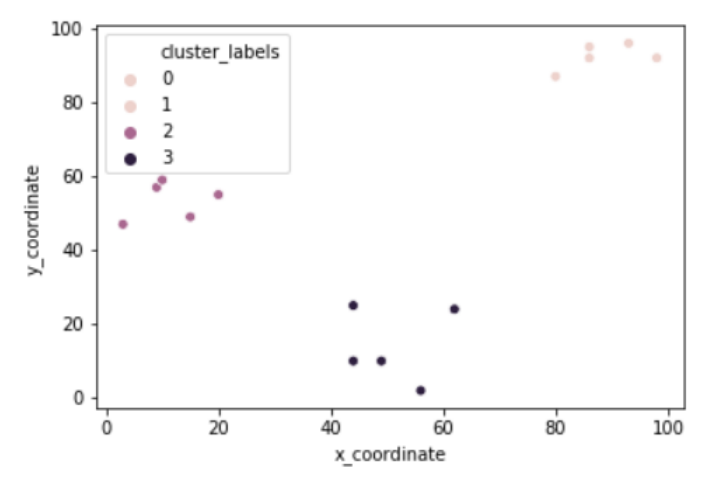

Here is the result of the seaborn scatterplot, showing the three clusters.

11. K-means clustering algorithm: Part 1

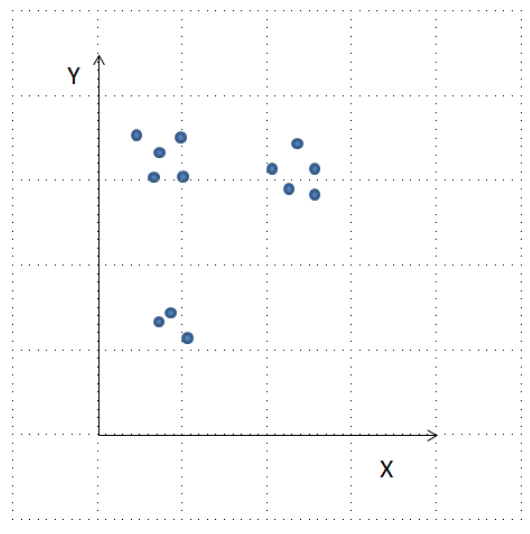

Next, we discuss the algorithm of k-means clustering with the same set of points to create three clusters.

12. K-means clustering algorithm: Part 2

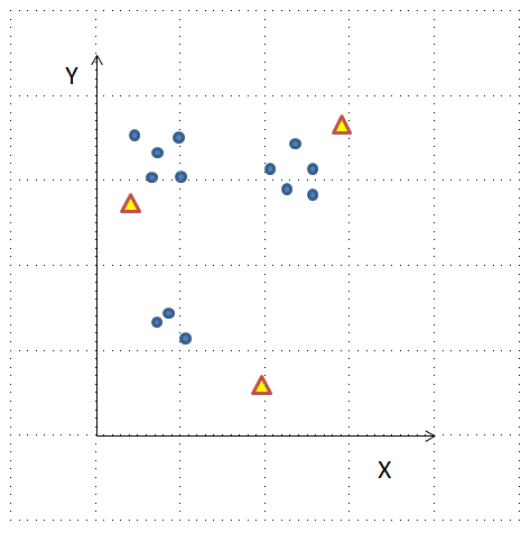

First, a random cluster center is generated for each of the three clusters.

13. K-means clustering algorithm: Part 3

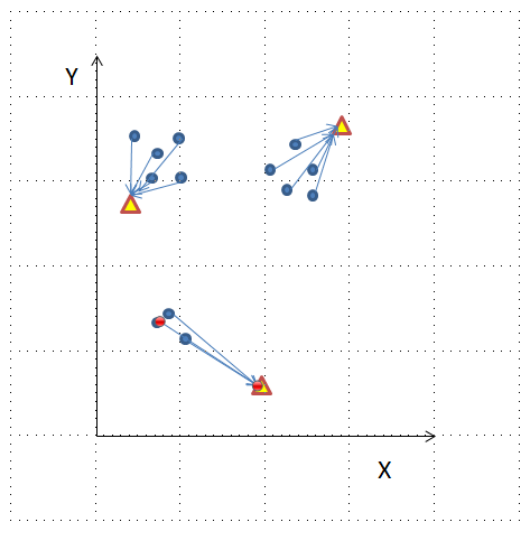

Next, the distance to these cluster centers is computed for each point to assign to the closest cluster.

14. K-means clustering algorithm: Part 4

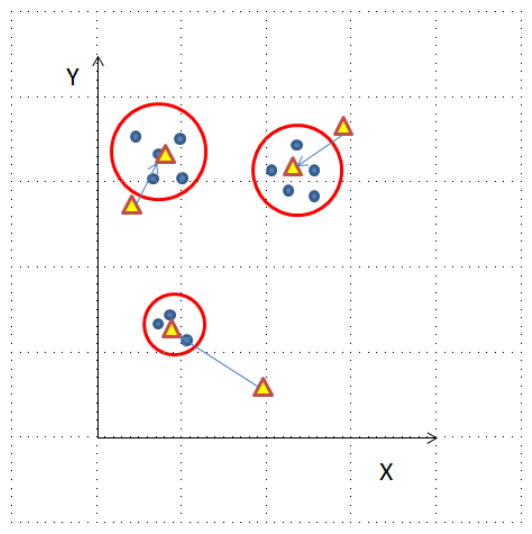

The cluster centers are recomputed. This iteration of assigning points to the recomputed cluster centers is performed a predefined number of times. Here, the clusters have been formed in the first iteration.

15. K-means clustering in SciPy

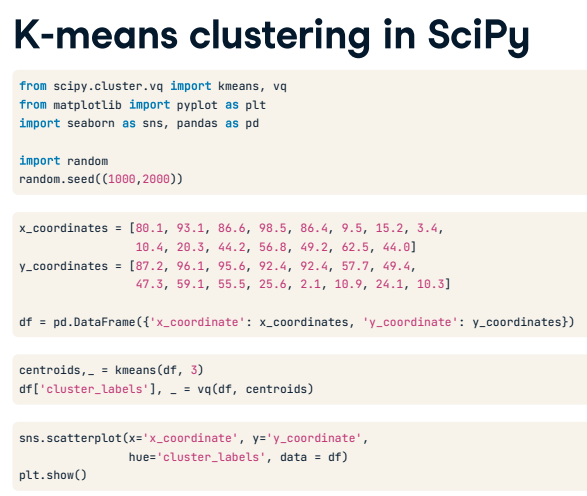

K-means clustering is implemented using methods kmeans and vq of scipy-dot-cluster-dot-vq. The centroids of the clusters are computed using kmeans and cluster assignments for each point are done through vq. The second argument in both methods is distortion, which we capture in a dummy variable. We will explore the parameters of these methods later in the course. Finally, we plot the clusters using seaborn.

16. K-means clustering results

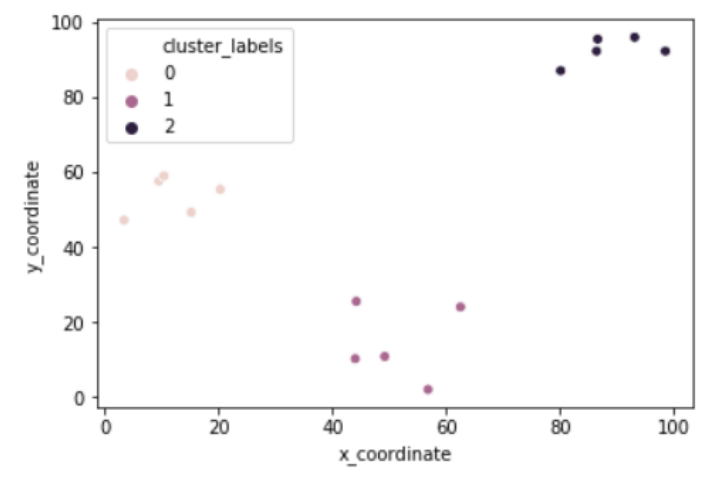

Here is the resulting plot.

17. Next up: hands-on exercises

Let us try some exercises now.

### Exercise

**Pokémon sightings: hierarchical clustering**

We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a pandas DataFrame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

**Instructions**

- Import the linkage and fcluster libraries.
- Use the linkage() function to compute distances using the ward method.
- Generate cluster labels for each data point with two clusters using the fcluster() function.
- Plot the points with seaborn and assign a different color to each cluster.

In [ ]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

In [12]:
df = pd.DataFrame({"x":x,
                   "y":y})
df

,x,y
0,9,8
1,6,4
2,2,10
3,3,6
4,1,0
5,7,4
6,1,10
7,6,10
8,1,6
9,7,1


In [18]:
df["x"]=df["x"].astype("float")
df["y"]=df["y"].astype("float")

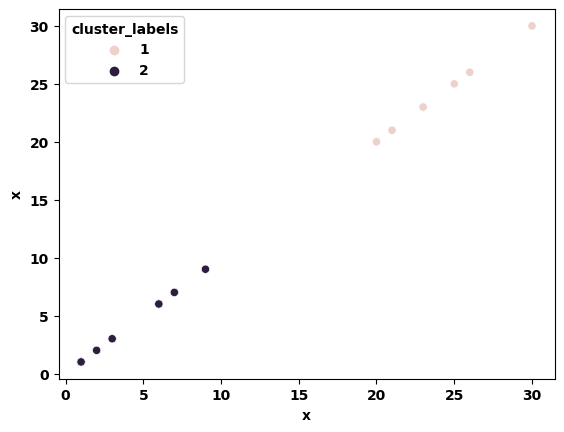

In [19]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x="x", y="x", hue="cluster_labels", data=df)
plt.show()

You are correct! Notice that the cluster labels are plotted with different colors.

### Exercise

**Pokémon sightings: k-means clustering**

We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings, stored in a pandas DataFrame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

**Instructions**

- Import the kmeans and vq functions.
- Use the kmeans() function to compute cluster centers by defining two clusters.
- Assign cluster labels to each data point using vq() function.
- Plot the points with seaborn and assign a different color to each cluster

In [20]:
df

,x,y,cluster_labels
0,9.0,8.0,2
1,6.0,4.0,2
2,2.0,10.0,2
3,3.0,6.0,2
4,1.0,0.0,2
5,7.0,4.0,2
6,1.0,10.0,2
7,6.0,10.0,2
8,1.0,6.0,2
9,7.0,1.0,2


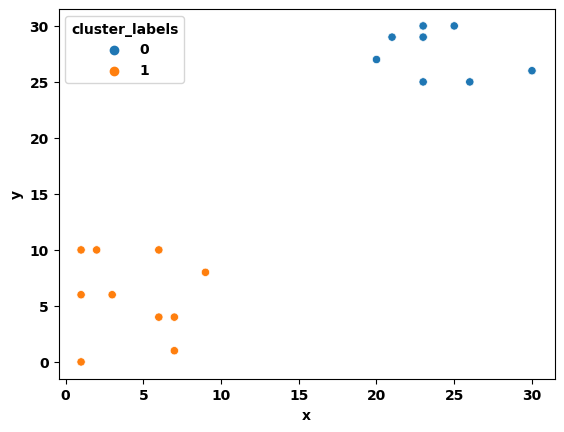

In [21]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x="x", y="y", hue="cluster_labels", data=df)
plt.show()

You are correct! Notice that in this case, the results of both types of clustering are similar. We will look at distinctly different results later in the course.

1. Data preparation for cluster analysis

Hello everyone. Now that you are familiar with the two basic clustering techniques, let us discuss an important step in processing data that we should apply before performing clustering.

2. Why do we need to prepare data for clustering?

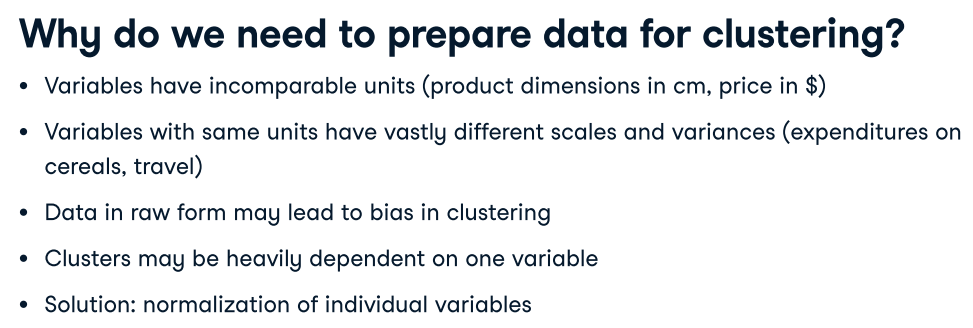

Why do we need to prepare data for clustering? Imagine a situation where you have a set of variables with incomparable units - such as the dimensions of a product and its price. Even if variables have the same unit, they may be significantly different in terms of their scales and variances. For instance, the amount that one may spend on an inexpensive item like cereals is low as compared to traveling expenses. If we use data in this raw form, the results of clustering may be biased. The clusters formed may be dependent on one variable significantly more than the other. How do we account for these issues, then? We use a process called normalization.

3. Normalization of data

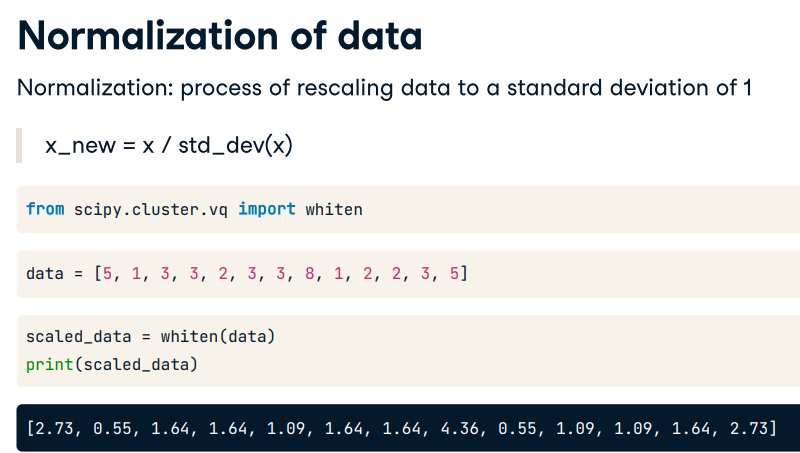

What is normalization of data? It is a process by which we rescale the values of a variable with respect to standard deviation of the data. The resultant standard deviation post normalization is 1. The process of normalization is simple and achieved through dividing a value by its standard deviation. Let us look at its implementation in Python. A normalization library is available on the SciPy package, using the whiten method of the vq class. First, we initiate the data to be normalized in a list and then use the whiten method, to transform. The array may be one or multi dimensional. Note that, in the example, we use a one dimensional list. In case of a multi dimensional array or list of lists, whiten divides each value by the standard deviation of the column. The result of the whiten method is an array of the same dimensions.

4. Illustration: normalization of data

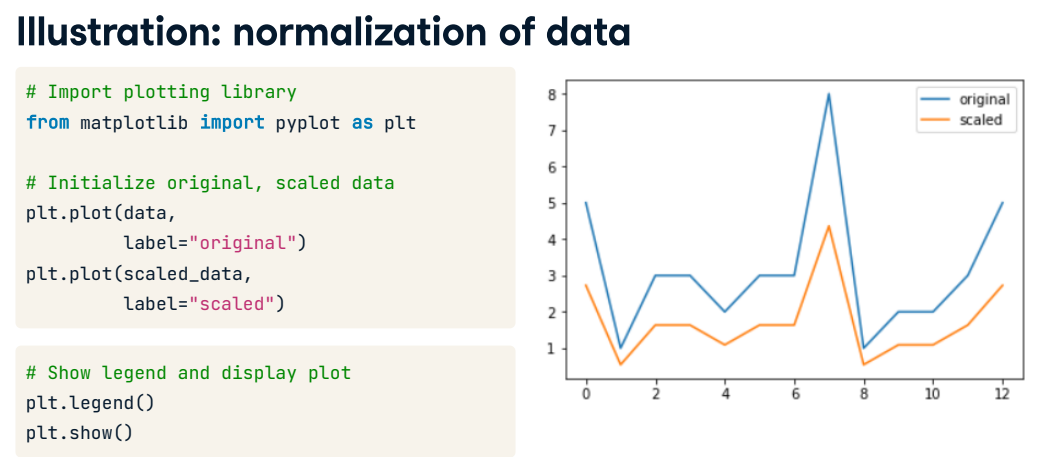

Let us look at a plot using the matplotlib library in Python to compare the results of the normalization process. First, you need import the pyplot class of the matplotlib library in Python. We initialized the two lists which contain the original and scaled data points. By default, pyplot plots line graphs. Next, we enable the legend in the graph and then display the plot. Let us see how the plot looks like. The original and scaled lists have been plotted in blue and orange colors, respectively. The serial number of the points is in the x axis, whereas the value of the original and scaled data points is in the y axis. As you can see, the variation in the scaled data has been toned down from the original data. Interestingly, the trends remain similar to the original data though.

5. Next up: some DIY exercises

With this, we come to the end of this demonstration. It is time for you get familiar with the normalization process by writing some code of your own.

## <a id="2"></a>
<font color="lightseagreen" size=+2.5><b>2. Hierarchical Clustering</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

This chapter focuses on a popular clustering algorithm - hierarchical clustering - and its implementation in SciPy. In addition to the procedure to perform hierarchical clustering, it attempts to help you answer an important question - how many clusters are present in your data? The chapter concludes with a discussion on the limitations of hierarchical clustering and discusses considerations while using hierarchical clustering.

## <a id="3"></a>
<font color="lightseagreen" size=+2.5><b>3. K-Means Clustering</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

This chapter introduces a different clustering algorithm - k-means clustering - and its implementation in SciPy. K-means clustering overcomes the biggest drawback of hierarchical clustering that was discussed in the last chapter. As dendrograms are specific to hierarchical clustering, this chapter discusses one method to find the number of clusters before running k-means clustering. The chapter concludes with a discussion on the limitations of k-means clustering and discusses considerations while using this algorithm.

## <a id="4"></a>
<font color="lightseagreen" size=+2.5><b>4. Clustering in Real World</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Now that you are familiar with two of the most popular clustering techniques, this chapter helps you apply this knowledge to real-world problems. The chapter first discusses the process of finding dominant colors in an image, before moving on to the problem discussed in the introduction - clustering of news articles. The chapter concludes with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.